In [1]:
library(cluster)
library(caret)
library(dplyr)
library(clValid)
options(warn=-1)
library(dplyr)
library(DataExplorer)
library(ggplot2)
library(tidyr)
library(patchwork)
library(cowplot)
library(scales)
library(tidyverse)
library(reshape2)
library(kableExtra)
library(vcd)
library(performanceEstimation)
library(class)
library(ipred)
library(caret)
library(mlbench)
library(ROCR)
library(pROC)
library(MASS)
library(countrycode)
library(randomForest);

Ładowanie wymaganego pakietu: ggplot2

Ładowanie wymaganego pakietu: lattice


Dołączanie pakietu: ‘dplyr’


Następujące obiekty zostały zakryte z ‘package:stats’:

    filter, lag


Następujące obiekty zostały zakryte z ‘package:base’:

    intersect, setdiff, setequal, union



Dołączanie pakietu: ‘cowplot’


Następujący obiekt został zakryty z ‘package:patchwork’:

    align_plots


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
✔ purrr     1.0.2     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ purrr::lift()       masks caret::lift()
✖ lubridate::stamp()  masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) 

In [2]:
test <- read.csv('data/test_data.csv', stringsAsFactors = TRUE)
train <- read.csv('data/train_data.csv', stringsAsFactors = TRUE)

In [3]:
data <- rbind(train, test)

In [4]:
x <- subset(data, select = -c(income_binary))

In [5]:
y <- subset(data, select = c(income_binary))

In [6]:
numerical_columns <- names(data[sapply(data, is.numeric)])
factor_columns <- names(data[sapply(data, is.factor)])

In [15]:
one_hot_encoded_data <- model.matrix(~ . -1, data = data)

In [17]:
colnames(one_hot_encoded_data)

[1] "age"                                 "workclassFederal-gov"               
 [3] "workclassLocal-gov"                  "workclassPrivate"                   
 [5] "workclassSelf-emp-inc"               "workclassSelf-emp-not-inc"          
 [7] "workclassState-gov"                  "workclassWithout-pay"               
 [9] "education11th"                       "education12th"                      
[11] "education1st-4th"                    "education5th-6th"                   
[13] "education7th-8th"                    "education9th"                       
[15] "educationAssoc-acdm"                 "educationAssoc-voc"                 
[17] "educationBachelors"                  "educationDoctorate"                 
[19] "educationHS-grad"                    "educationMasters"                   
[21] "educationPreschool"                  "educationProf-school"               
[23] "educationSome-college"               "marital.statusMarried-AF-spouse"    
[25] "marital.statusMarried-civ-spouse"    "marital.statusMarried-spouse-absent"
[27] "marital.statusNever-married"         "marital.statusSeparated"            
[29] "marital.statusWidowed"               "occupationArmed-Forces"             
[31] "occupationCraft-repair"              "occupationExec-managerial"          
[33] "occupationFarming-fishing"           "occupationHandlers-cleaners"        
[35] "occupationMachine-op-inspct"         "occupationOther-service"            
[37] "occupationPriv-house-serv"           "occupationProf-specialty"           
[39] "occupationProtective-serv"           "occupationSales"                    
[41] "occupationTech-support"              "occupationTransport-moving"         
[43] "relationshipNot-in-family"           "relationshipOther-relative"         
[45] "relationshipOwn-child"               "relationshipUnmarried"              
[47] "relationshipWife"                    "raceAsian-Pac-Islander"             
[49] "raceBlack"                           "raceOther"                          
[51] "raceWhite"                           "sexMale"                            
[53] "hours.per.week"                      "income_binary"                      
[55] "capital"                             "continentEurope & Central Asia"     
[57] "continentLatin America & Caribbean"  "continentMiddle East & North Africa"
[59] "continentNorth America"              "continentSouth Asia"

In [25]:
x_encoded <- subset(one_hot_encoded_data, select = -c(income_binary))

In [26]:
scaled_data <- scale(x_encoded)

In [27]:
scaled_data

,age,workclassFederal-gov,workclassLocal-gov,workclassPrivate,workclassSelf-emp-inc,workclassSelf-emp-not-inc,workclassState-gov,workclassWithout-pay,education11th,education12th,⋯,raceOther,raceWhite,sexMale,hours.per.week,capital,continentEurope & Central Asia,continentLatin America & Caribbean,continentMiddle East & North Africa,continentNorth America,continentSouth Asia
1,0.86639845,-0.1791334,-0.2712856,-1.6719919,-0.1943531,3.3034167,-0.2119978,-0.02155438,-0.1926928,-0.1136846,⋯,-0.08869808,0.4030263,0.6938172,-2.32668844,-0.1344961,-0.1288031,-0.2090768,-0.0352118,0.3014462,-0.08932902
2,-0.04145337,-0.1791334,-0.2712856,0.5980758,-0.1943531,-0.3027102,-0.2119978,-0.02155438,-0.1926928,-0.1136846,⋯,-0.08869808,0.4030263,0.6938172,-0.07812007,-0.1344961,-0.1288031,-0.2090768,-0.0352118,0.3014462,-0.08932902
3,1.09336140,-0.1791334,-0.2712856,0.5980758,-0.1943531,-0.3027102,-0.2119978,-0.02155438,5.1894936,-0.1136846,⋯,-0.08869808,-2.4811726,0.6938172,-0.07812007,-0.1344961,-0.1288031,-0.2090768,-0.0352118,0.3014462,-0.08932902
4,-0.79799655,-0.1791334,-0.2712856,0.5980758,-0.1943531,-0.3027102,-0.2119978,-0.02155438,-0.1926928,-0.1136846,⋯,-0.08869808,-2.4811726,-1.4412700,-0.07812007,-0.1344961,-0.1288031,4.7828253,-0.0352118,-3.3172684,-0.08932902
5,-0.11710768,-0.1791334,-0.2712856,0.5980758,-0.1943531,-0.3027102,-0.2119978,-0.02155438,-0.1926928,-0.1136846,⋯,-0.08869808,0.4030263,-1.4412700,-0.07812007,-0.1344961,-0.1288031,-0.2090768,-0.0352118,0.3014462,-0.08932902
6,0.79074413,-0.1791334,-0.2712856,0.5980758,-0.1943531,-0.3027102,-0.2119978,-0.02155438,-0.1926928,-0.1136846,⋯,-0.08869808,-2.4811726,-1.4412700,-2.07684751,-0.1344961,-0.1288031,4.7828253,-0.0352118,-3.3172684,-0.08932902
7,1.01770708,-0.1791334,-0.2712856,-1.6719919,-0.1943531,3.3034167,-0.2119978,-0.02155438,-0.1926928,-0.1136846,⋯,-0.08869808,0.4030263,0.6938172,0.33828149,-0.1344961,-0.1288031,-0.2090768,-0.0352118,0.3014462,-0.08932902
8,-0.57103359,-0.1791334,-0.2712856,0.5980758,-0.1943531,-0.3027102,-0.2119978,-0.02155438,-0.1926928,-0.1136846,⋯,-0.08869808,0.4030263,-1.4412700,0.75468304,1.7357905,-0.1288031,-0.2090768,-0.0352118,0.3014462,-0.08932902
9,0.26116391,-0.1791334,-0.2712856,0.5980758,-0.1943531,-0.3027102,-0.2119978,-0.02155438,-0.1926928,-0.1136846,⋯,-0.08869808,0.4030263,0.6938172,-0.07812007,0.5531170,-0.1288031,-0.2090768,-0.0352118,0.3014462,-0.08932902
10,-0.11710768,-0.1791334,-0.2712856,0.5980758,-0.1943531,-0.3027102,-0.2119978,-0.02155438,-0.1926928,-0.1136846,⋯,-0.08869808,-2.4811726,0.6938172,3.25309234,-0.1344961,-0.1288031,-0.2090768,-0.0352118,0.3014462,-0.08932902


In [21]:
pca_result <- prcomp(scaled_data, center = TRUE, scale. = TRUE)

In [22]:
summary(pca_result)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.90604 1.55940 1.49875 1.40398 1.32550 1.30474 1.23402
Proportion of Variance 0.06055 0.04053 0.03744 0.03285 0.02928 0.02837 0.02538
Cumulative Proportion  0.06055 0.10108 0.13852 0.17137 0.20065 0.22902 0.25440
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.19464 1.17705 1.15213 1.12880 1.10321 1.09023 1.08336
Proportion of Variance 0.02379 0.02309 0.02212 0.02124 0.02028 0.01981 0.01956
Cumulative Proportion  0.27819 0.30128 0.32340 0.34464 0.36493 0.38473 0.40430
                          PC15    PC16   PC17    PC18    PC19    PC20    PC21
Standard deviation     1.07691 1.06414 1.0563 1.05250 1.04701 1.04406 1.03250
Proportion of Variance 0.01933 0.01887 0.0186 0.01846 0.01827 0.01817 0.01777
Cumulative Proportion  0.42363 0.44250 0.4611 0.47956 0.49783 0.51600 0.53376
                          PC22

In [14]:
variance_pca <- (pca_result$sdev ^2)/sum(pca_result$sdev^2)
pca_data <- pca_result$x %>% data.frame
cumulative_variance <- cumsum(variance_pca)

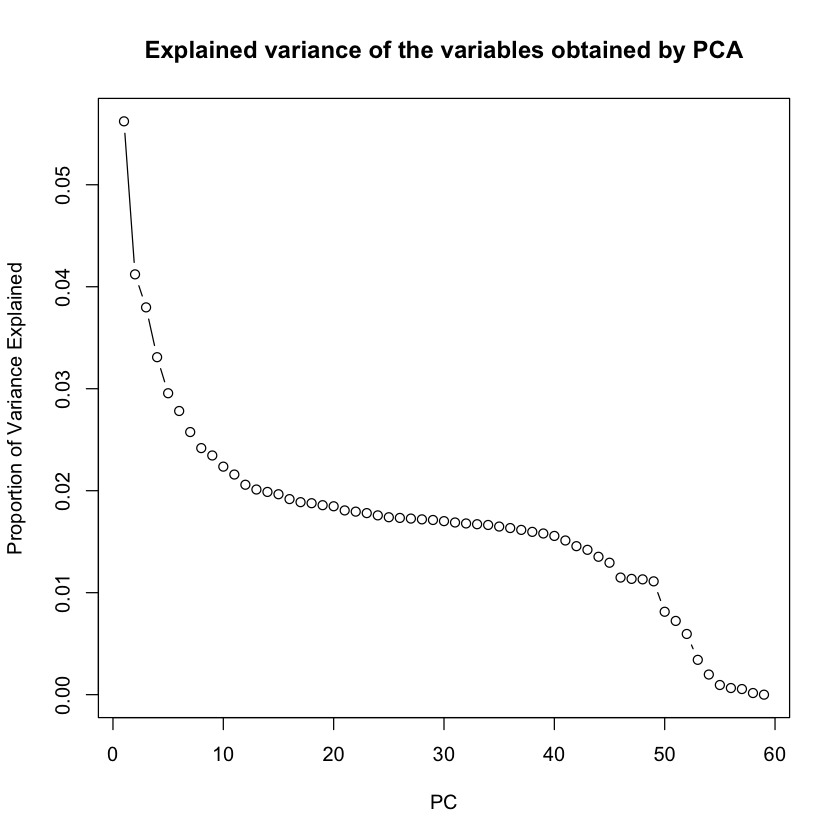

In [15]:
plot(variance_pca, type = "b", xlab = "PC", ylab = "Proportion of Variance Explained")
title('Explained variance of the variables obtained by PCA')

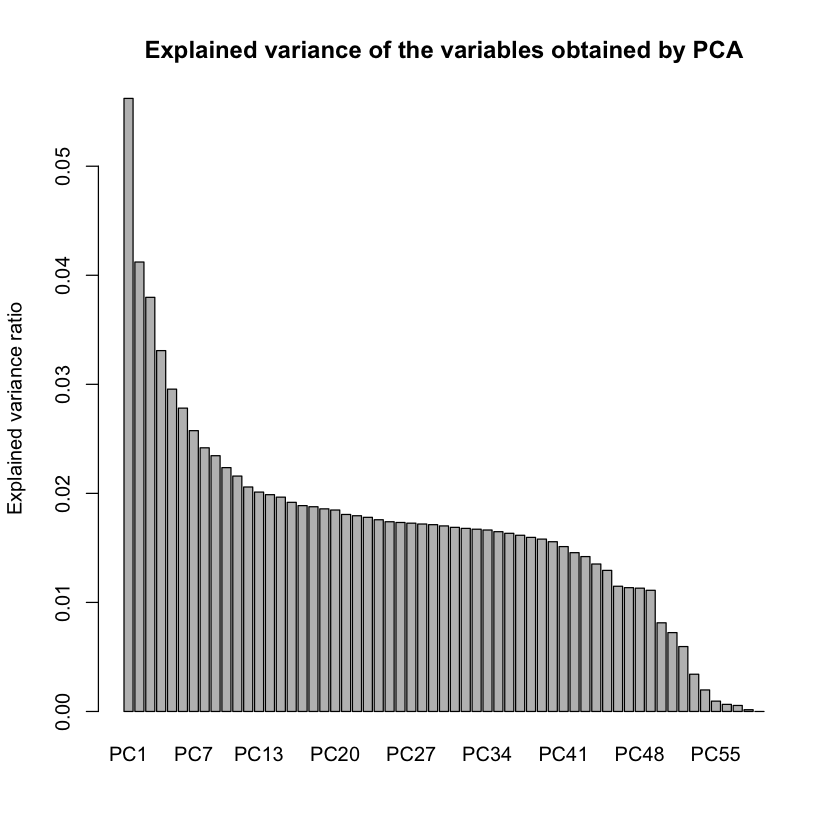

In [16]:
barplot(variance_pca, names.arg = sprintf("PC%s",seq(1:length(variance_pca))),
        ylab = 'Explained variance ratio')
title('Explained variance of the variables obtained by PCA')

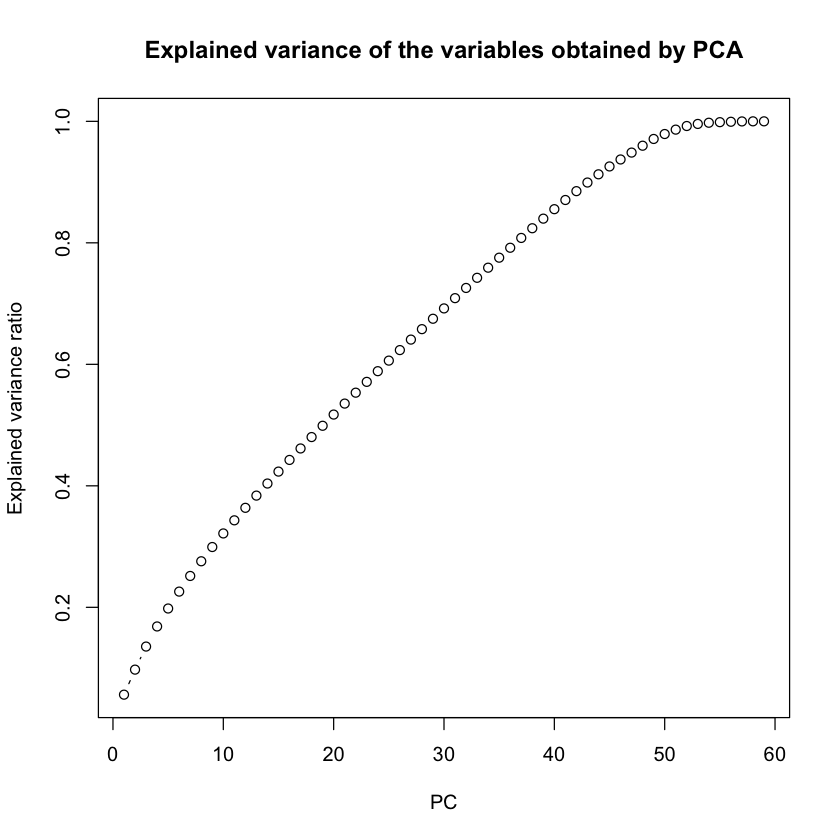

In [17]:
plot(cumulative_variance, type = "b", xlab = "PC", ylab = "Explained variance ratio")
title('Explained variance of the variables obtained by PCA')

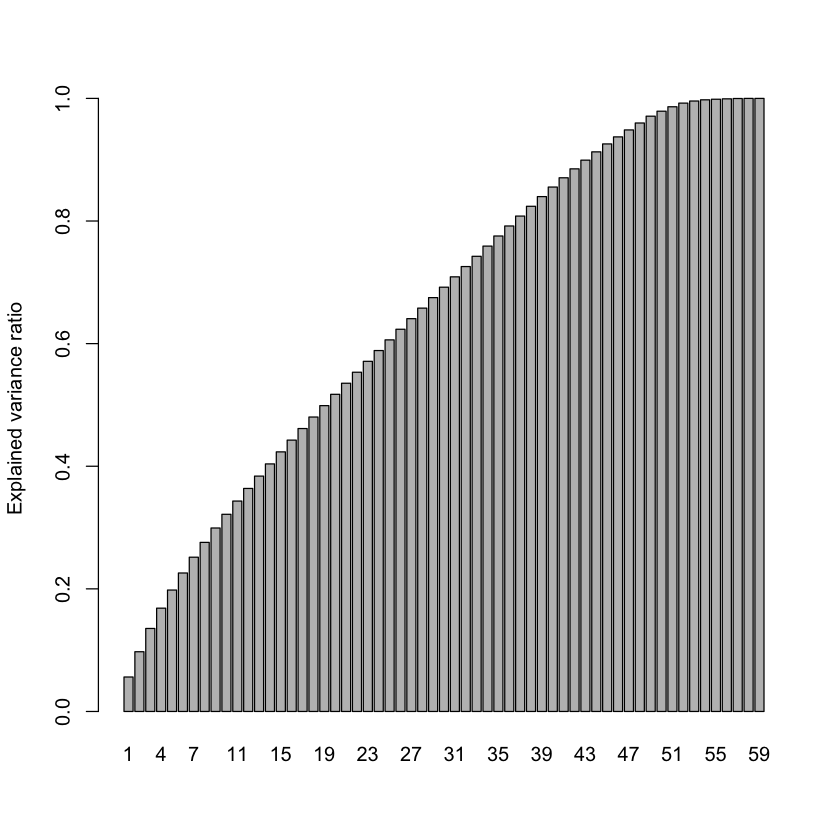

In [18]:
barplot(cumulative_variance, ylab = 'Explained variance ratio', names.arg=seq(1:length(variance_pca)))

In [19]:
ggplot() +
  geom_point(
    aes(x=pca_data$PC1,
        y=pca_data$PC2,
        color=data$income_binary$label %>% as.factor),
    size=2)+
  labs(title='Data set after performing (PCA)', color='True Label')

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! nie znaleziono obiektu 'pca_data'

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error

In [ ]:
kmeans.res <- kmeans(pca_data[, 1:10], 2, nstart=10)
kmeans.final.pca = kmeans.res$cluster

In [ ]:
pam.final.pca <- pam(pca_data[,1:10], k=2)$clustering

In [ ]:
agnes.res <- agnes(pca_data[, 1:10],  method="complete")
agnes.final.pca <- cutree(agnes.res, k=2)

In [ ]:
diana.res <- diana(pca_data[, 1:10])
diana.final.pca <- cutree(diana.res, k=2)